In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_47417_U')

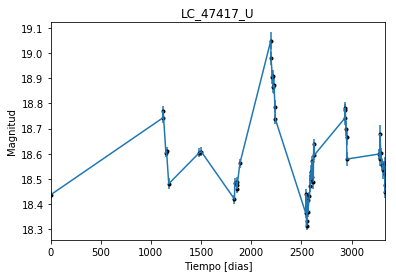

In [2]:
data = np.genfromtxt('LC_47417_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_47417_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

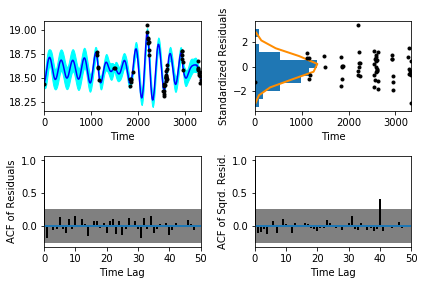

In [5]:
sample.assess_fit()

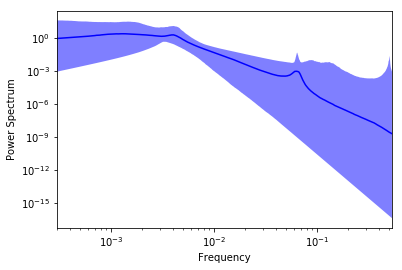

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_47417_U')

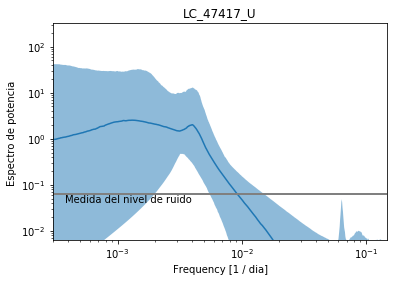

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_47417_U')

Text(0.5,1,'Prediccion , valor esperado LC_47417_U')

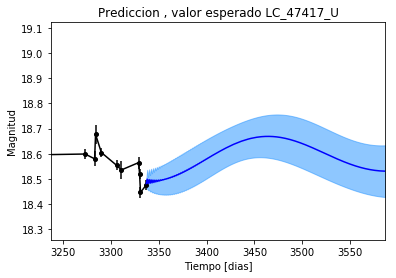

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_47417_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_47417_U')

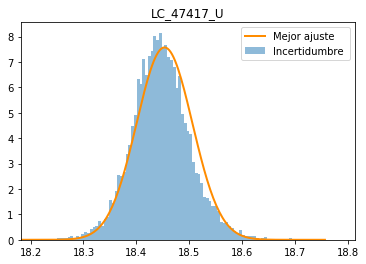

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_47417_U')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_U')

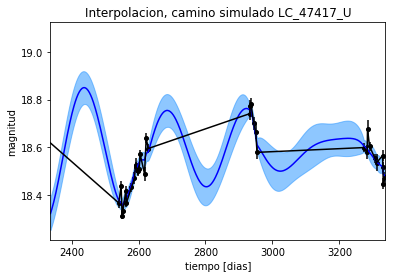

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_U')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_U')

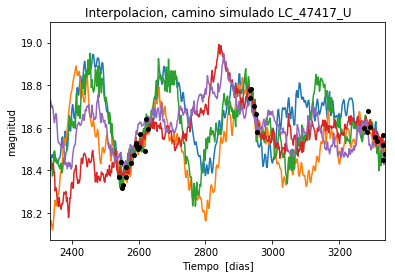

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1729.62468665
Median: 0.00427768350034
Standard deviation: 0.0981865193765
68% credibility interval: [ 0.00054659  0.03667669]
95% credibility interval: [ 0.0003342   0.25617879]
99% credibility interval: [  3.02425555e-04   8.17452354e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 389.776749437
Median: 0.00308375596963
Standard deviation: 0.0694645066765
68% credibility interval: [ 0.00053111  0.02884448]
95% credibility interval: [ 0.00033188  0.19337508]
99% credibility interval: [  3.02425555e-04   4.58937032e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 218.8821093
Median: 0.00089383482073
Standard deviation

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 141.173506643
Median: 96.8589214794
Standard deviation: 3.19449837113
68% credibility interval: [  93.94860927  100.6114466 ]
95% credibility interval: [  91.14692789  103.16778969]
99% credibility interval: [  88.97661397  104.63862431]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 326.757704098
Median: 0.204195509178
Standard deviation: 1.51105863604
68% credibility interval: [ 0.02970216  1.56924505]
95% credibility interval: [ 0.01180581  5.43755947]
99% credibility interval: [ 0.00896587  8.71831301]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 175.842669848
Median: 0.44013789522
Standard deviation: 9.18437315288
68% credibility interval: [  7.70052009e-03   1.00117006e+01]
95% credibility interval: [  8.25

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 641.311491034
Median: 0.0666781875074
Standard deviation: 4.37043088663e+127
68% credibility interval: [  2.65980401e-56   8.71860461e+72]
95% credibility interval: [  5.68724524e-099   6.50276042e+117]
99% credibility interval: [  3.75386342e-104   7.98193224e+126]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2679.76203384
Median: 18.5927329133
Standard deviation: 0.0608335439529
68% credibility interval: [ 18.54614413  18.63867802]
95% credibility interval: [ 18.46464801  18.70244142]
99% credibility interval: [ 18.36217339  18.78293269]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 87.0741799059
Median: 0.0946347520276
Standard deviation: 0.251549387341
68% credibility interval: [ 0.00380094  0.50230108]
95% credibility interval: [ 0.         0.9265907]
99% credibility interval: [ 0.          1.03721544]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 87.0741799059
Median: 0.0946347520276
Standard deviation: 0.251549387341
68% credibility interval: [ 0.00380094  0.50230108]
95% credibility interval: [ 0.         0.9265907]
99% credibility interval: [ 0.          1.03721544]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 190.94075387
Median: 0.00158573723453
Standard deviation: 0.00176918876063

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 141.173506643
Median: 96.8589214794
Standard deviation: 3.19449837113
68% credibility interval: [  93.94860927  100.6114466 ]
95% credibility interval: [  91.14692789  103.16778969]
99% credibility interval: [  88.97661397  104.63862431]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 370.550120955
Median: 0.0295309321242
Standard deviation: 0.0431619089924
68% credibility interval: [ 0.01769667  0.06127829]
95% credibility interval: [ 0.01238299  0.13734415]
99% credibility interval: [ 0.01012994  0.28173693]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 135.141444988
Median: 1.40731542088
Standard deviation: 0.335666274781
68% credibility interval: [ 0.99853573  1.765748  ]
95% credibility interval: [ 0.79222072  1.95532993]
99% credibility interval: [ 0.7050899   1.98945905]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 435.009378986
Median: 4.57420549339e-07
Standard deviation: 0.240121868419
68% credibility interval: [  2.74747523e-76   3.20756960e-03]
95% credibility interval: [  1.34486623e-122   3.47029403e-001]
99% credibility interval: [  8.17453694e-132   1.35366316e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1729.62468665
Median: (-0.0268774781181-3.23093990343j)
Standard deviation: 1.69666581641
68% credibility interval: [-0.23044643-3.3649468j  -0.00343434-0.01621991j]
95% credibility interval: [-1.60961880-2.93074792j -0.00209984-0.39815268j]
99% credibility interval: [ -5.13620462e+00-6.65788879j  -1.90019580e-03-0.39334902j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 389.776749437
Median: (-0.0193758101993+0j)
Standard deviation: 1.63968761025
68% credibility interval: [-0.18123522+1.05308404j -0.00333703+1.09571378j]
95% credibility interval: [-1.21501149+2.24121384j -0.00208528+0.67521222j]
99% credibility interval: [ -2.88358642e+00+4.61431726j  -1.90019580e-03+0.39334902j]
Posterior summary for parameter ar_r